In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [2]:
data = pd.read_csv("fake_patient_data.csv")
columns_of_interest = ['Diabetic', 'Catheter']
dummy_data = pd.get_dummies(data, columns=['Diabetic', 'Catheter'])

# Interaction terms
data['Interaction_Y_Y'] = (dummy_data['Diabetic_Y'] * dummy_data['Catheter_Y']).astype(int)
data['Interaction_Y_N'] = (dummy_data['Diabetic_Y'] * dummy_data['Catheter_N']).astype(int)
data['Interaction_N_Y'] = (dummy_data['Diabetic_N'] * dummy_data['Catheter_Y']).astype(int)
data['Interaction_N_N'] = (dummy_data['Diabetic_N'] * dummy_data['Catheter_N']).astype(int)

pathogens = ['E_coli', 'K_pneumoniae', 'P_mirabilis', 'E_faecalis', 'S_saprophyticus', 'P_aeruginosa', 'C_albicans']
X = data[columns_of_interest]
X = data.drop(columns=pathogens)

E_coli Classification Report: 
              precision    recall  f1-score   support

           N       0.67      0.62      0.64        13
           Y       0.38      0.43      0.40         7

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20

E_coli Confusion Matrix: 
[[8 5]
 [4 3]]
E_coli Accuracy: 0.55


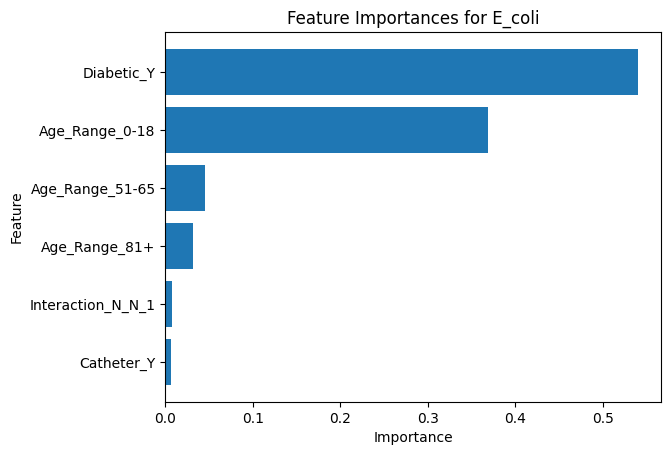

K_pneumoniae Classification Report: 
              precision    recall  f1-score   support

           N       0.75      0.86      0.80        14
           Y       0.50      0.33      0.40         6

    accuracy                           0.70        20
   macro avg       0.62      0.60      0.60        20
weighted avg       0.68      0.70      0.68        20

K_pneumoniae Confusion Matrix: 
[[12  2]
 [ 4  2]]
K_pneumoniae Accuracy: 0.7


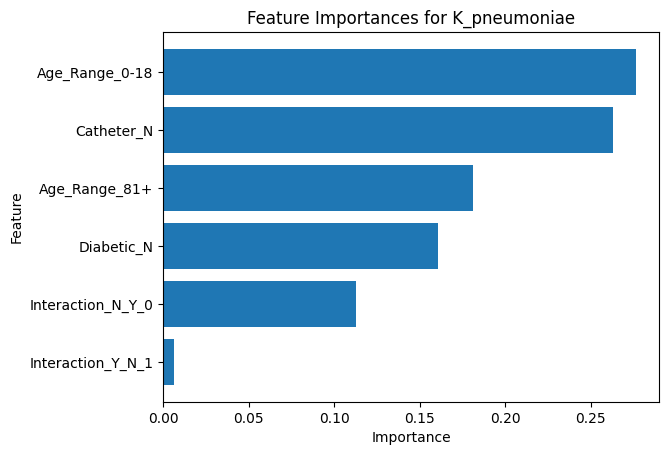

P_mirabilis Classification Report: 
              precision    recall  f1-score   support

           N       0.50      0.33      0.40         9
           Y       0.57      0.73      0.64        11

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20

P_mirabilis Confusion Matrix: 
[[3 6]
 [3 8]]
P_mirabilis Accuracy: 0.55


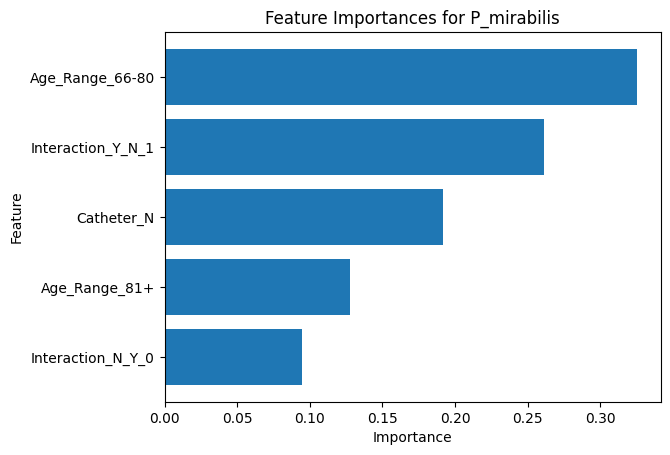

E_faecalis Classification Report: 
              precision    recall  f1-score   support

           N       0.53      0.67      0.59        12
           Y       0.20      0.12      0.15         8

    accuracy                           0.45        20
   macro avg       0.37      0.40      0.37        20
weighted avg       0.40      0.45      0.42        20

E_faecalis Confusion Matrix: 
[[8 4]
 [7 1]]
E_faecalis Accuracy: 0.45


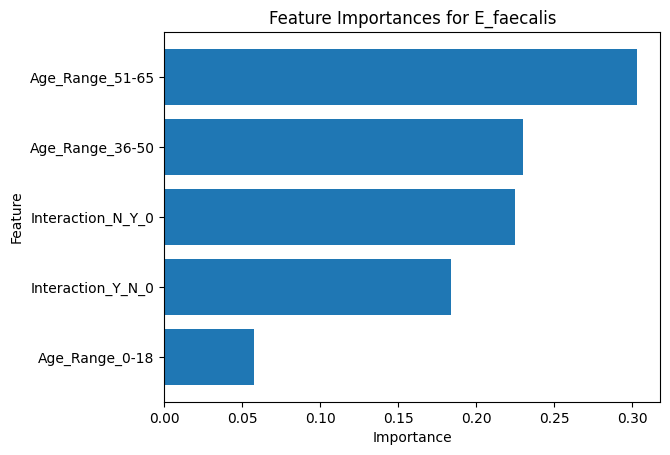

S_saprophyticus Classification Report: 
              precision    recall  f1-score   support

           N       0.56      0.50      0.53        10
           Y       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

S_saprophyticus Confusion Matrix: 
[[5 5]
 [4 6]]
S_saprophyticus Accuracy: 0.55


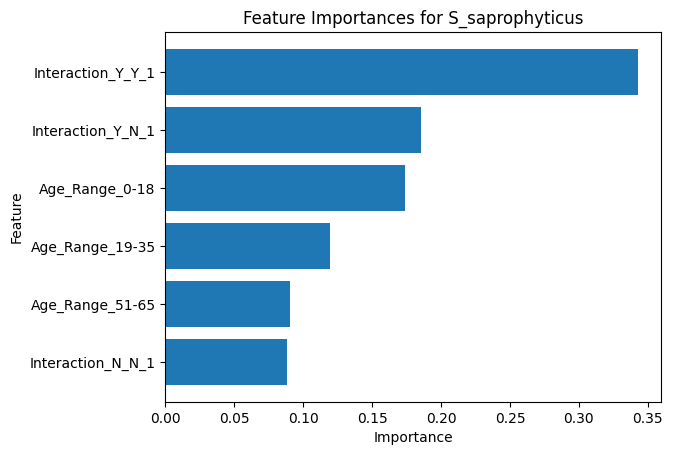

P_aeruginosa Classification Report: 
              precision    recall  f1-score   support

           N       0.45      0.56      0.50         9
           Y       0.56      0.45      0.50        11

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20

P_aeruginosa Confusion Matrix: 
[[5 4]
 [6 5]]
P_aeruginosa Accuracy: 0.5


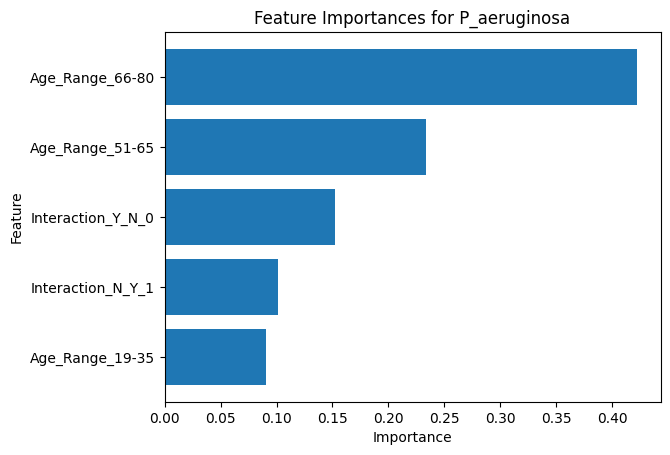

C_albicans Classification Report: 
              precision    recall  f1-score   support

           N       0.62      0.73      0.67        11
           Y       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

C_albicans Confusion Matrix: 
[[8 3]
 [5 4]]
C_albicans Accuracy: 0.6


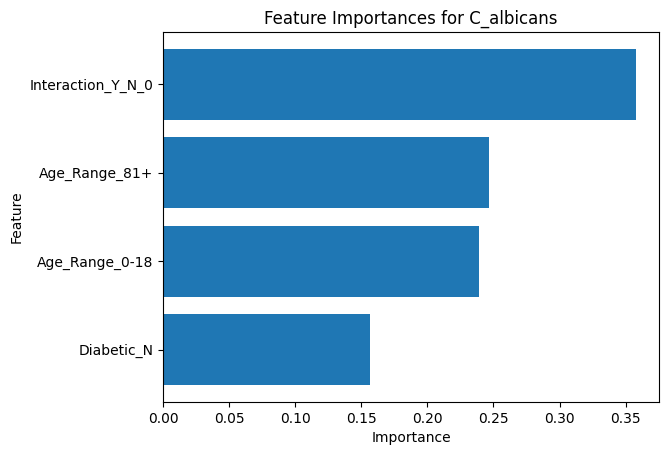

In [3]:
# With Age_Range in features

for pathogen in pathogens:
    y = data[pathogen]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Decision tree model
    clf = DecisionTreeClassifier(max_depth=3, random_state=13)
    clf = make_pipeline(OneHotEncoder(), clf)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(pathogen + f" Classification Report: \n{class_report}")
    print(pathogen + f" Confusion Matrix: \n{conf_matrix}")
    print(pathogen + f" Accuracy: {accuracy}")

    # Feature importances
    feature_importances = model.named_steps['decisiontreeclassifier'].feature_importances_
    feature_names = model.named_steps['onehotencoder'].get_feature_names_out(X_train.columns)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    importance_df = importance_df[importance_df['Importance'] != 0]

    # Plot feature importances
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {pathogen}')
    plt.gca().invert_yaxis()
    plt.show()


E_coli Classification Report: 
              precision    recall  f1-score   support

           N       0.71      0.77      0.74        13
           Y       0.50      0.43      0.46         7

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20

E_coli Confusion Matrix: 
[[10  3]
 [ 4  3]]
E_coli Accuracy: 0.65


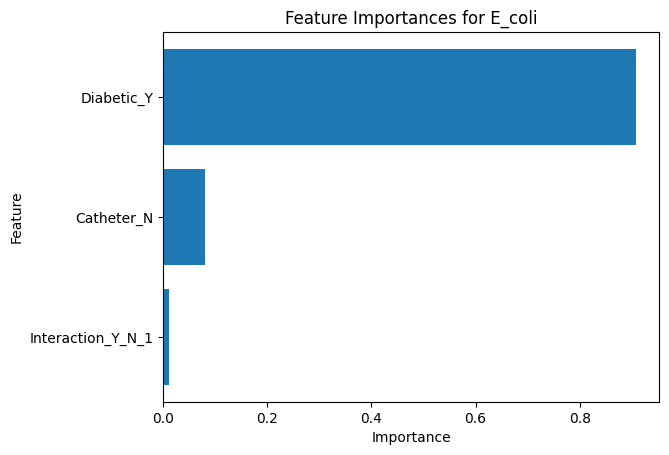

K_pneumoniae Classification Report: 
              precision    recall  f1-score   support

           N       0.75      0.86      0.80        14
           Y       0.50      0.33      0.40         6

    accuracy                           0.70        20
   macro avg       0.62      0.60      0.60        20
weighted avg       0.68      0.70      0.68        20

K_pneumoniae Confusion Matrix: 
[[12  2]
 [ 4  2]]
K_pneumoniae Accuracy: 0.7


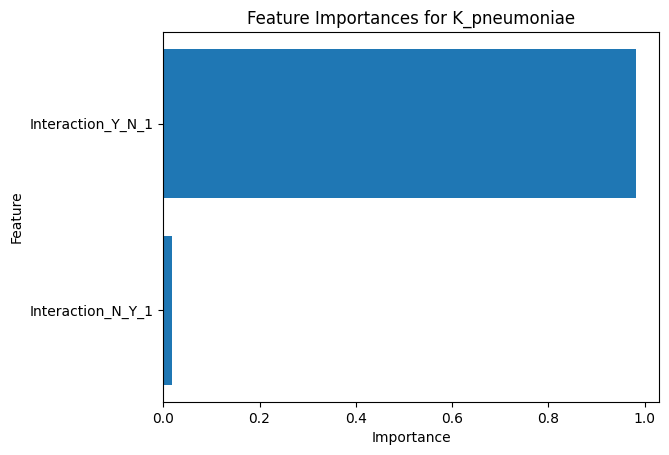

P_mirabilis Classification Report: 
              precision    recall  f1-score   support

           N       0.40      0.22      0.29         9
           Y       0.53      0.73      0.62        11

    accuracy                           0.50        20
   macro avg       0.47      0.47      0.45        20
weighted avg       0.47      0.50      0.47        20

P_mirabilis Confusion Matrix: 
[[2 7]
 [3 8]]
P_mirabilis Accuracy: 0.5


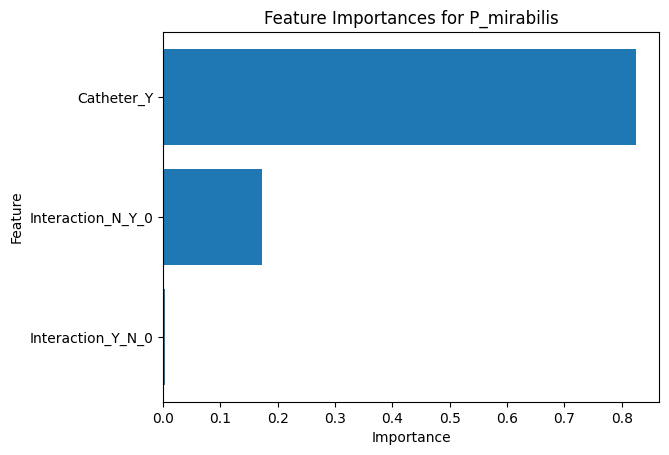

E_faecalis Classification Report: 
              precision    recall  f1-score   support

           N       0.64      0.58      0.61        12
           Y       0.44      0.50      0.47         8

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.56      0.55      0.55        20

E_faecalis Confusion Matrix: 
[[7 5]
 [4 4]]
E_faecalis Accuracy: 0.55


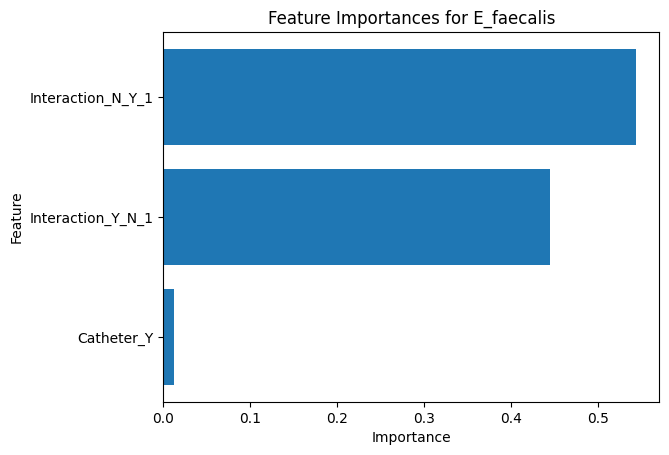

S_saprophyticus Classification Report: 
              precision    recall  f1-score   support

           N       0.17      0.10      0.12        10
           Y       0.36      0.50      0.42        10

    accuracy                           0.30        20
   macro avg       0.26      0.30      0.27        20
weighted avg       0.26      0.30      0.27        20

S_saprophyticus Confusion Matrix: 
[[1 9]
 [5 5]]
S_saprophyticus Accuracy: 0.3


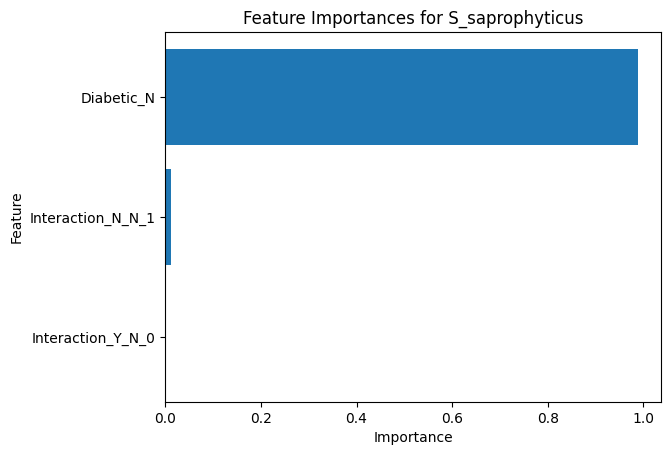

P_aeruginosa Classification Report: 
              precision    recall  f1-score   support

           N       0.45      1.00      0.62         9
           Y       0.00      0.00      0.00        11

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20

P_aeruginosa Confusion Matrix: 
[[ 9  0]
 [11  0]]
P_aeruginosa Accuracy: 0.45


c:\Users\ellio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ellio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ellio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

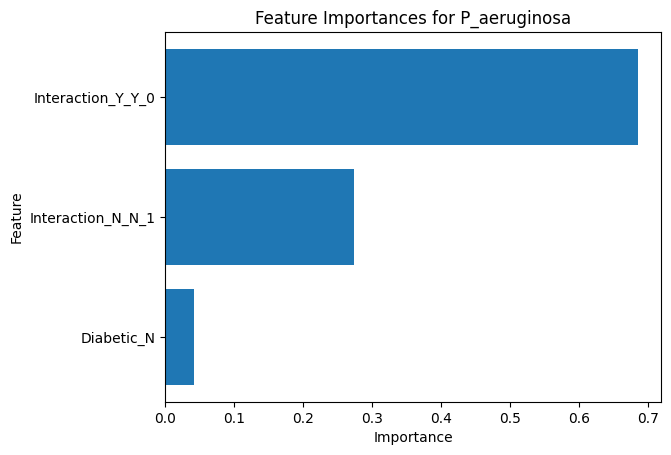

C_albicans Classification Report: 
              precision    recall  f1-score   support

           N       0.60      0.82      0.69        11
           Y       0.60      0.33      0.43         9

    accuracy                           0.60        20
   macro avg       0.60      0.58      0.56        20
weighted avg       0.60      0.60      0.57        20

C_albicans Confusion Matrix: 
[[9 2]
 [6 3]]
C_albicans Accuracy: 0.6


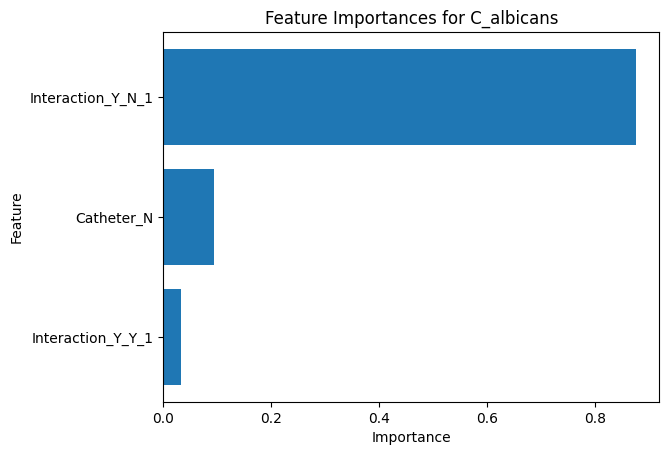

In [16]:
# Without Age_Range as Factor

X = X.drop(columns=['Age_Range'])

for pathogen in pathogens:
    y = data[pathogen]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Decision tree model
    pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    DecisionTreeClassifier())
    
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(pathogen + f" Classification Report: \n{class_report}")
    print(pathogen + f" Confusion Matrix: \n{conf_matrix}")
    print(pathogen + f" Accuracy: {accuracy}")

    # Feature importances
    feature_importances = model.named_steps['decisiontreeclassifier'].feature_importances_
    feature_names = model.named_steps['onehotencoder'].get_feature_names_out(X_train.columns)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    importance_df = importance_df[importance_df['Importance'] != 0]

    # Plot feature importances
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {pathogen}')
    plt.gca().invert_yaxis()
    plt.show()